# Time Series Forecasting with ARIMA model
## We start by installing the following libraries if necessary:
**quandl:** GET stock data<br>
**pixiedust:** PixieDust is an open source helper library that works as an add-on to Jupyter notebooks to improve the user experience of working with data.<br>
**statsmodels** statsmodels is a Python module that provides classes and functions for the estimation of many different statistical modelsl.

In [1]:
# !pip install pixiedust

  Using cached pixiedust-1.1.19-py3-none-any.whl
  Using cached geojson-2.5.0-py2.py3-none-any.whl (14 kB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached colour-0.1.5-py2.py3-none-any.whl (23 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached importlib_metadata-4.11.3-py3-none-any.whl (18 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [2]:
# !pip install quandl

In [3]:
# !pip install statsmodels

## Import a few modules and optionally set the quandl API key

In [2]:
import pixiedust
from pixiedust.display.app import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl


#To get an API key, go to https://www.quandl.com
quandl.ApiConfig.api_key = "s3yrtLzN7YqLJmcsgFJ5" #Replace your API Key

## Download the stock data for MSFT and display a bokeh line chart of the Time Serie

In [3]:
msft = quandl.get('WIKI/MSFT')
msft['daily_spread'] = msft['Adj. Close'].diff()
msft = msft.reset_index()

In [4]:
msft

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,daily_spread
0,1986-03-13,25.500,29.250,25.50,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09,NaN
1,1986-03-14,28.000,29.500,28.00,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08,0.002311
2,1986-03-17,29.000,29.750,29.00,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08,0.001156
3,1986-03-18,29.500,29.750,28.50,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07,-0.001734
4,1986-03-19,28.750,29.000,28.00,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07,-0.001156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8071,2018-03-21,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930000,94.050000,92.210000,92.480000,2.375326e+07,-0.650000
8072,2018-03-22,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265000,91.750000,89.660000,89.790000,3.757817e+07,-2.690000
8073,2018-03-23,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500000,90.460000,87.080000,87.180000,4.215940e+07,-2.610000
8074,2018-03-26,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610000,94.000000,90.400000,93.780000,5.503115e+07,6.600000


In [5]:
display(msft)

Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,daily_spread
1993-04-22 00:00:00,84.5,85.0,82.87,83.25,2496000.0,0.0,1.0,1.7578408750904,1.7682423003868,1.7239322286242,1.7318373118494,79872000.0,-0.033700617960300105
1999-06-30 00:00:00,87.75,90.25,86.75,90.19,28805100.0,0.0,1.0,29.207202232271,30.039316255983,28.874356622787,30.019345519414,57610200.0,0.728931884771999
2007-03-21 00:00:00,27.895,28.52,27.56,28.52,72808200.0,0.0,1.0,21.532249742306,22.014689465874,21.273662050473,22.014689465874,72808200.0,0.5248944192419991
2008-07-09 00:00:00,25.75,25.85,25.18,25.23,54255800.0,0.0,1.0,20.228091240513,20.306646934651,19.780323783927,19.819601630996,54255800.0,-0.4870453036549982
1988-03-16 00:00:00,62.75,64.75,62.0,64.75,378800.0,0.0,1.0,0.29008419437718,0.29932990575175,0.28661705261172,0.29932990575175,54547200.0,0.010401425296389988
1987-11-25 00:00:00,47.5,47.75,46.0,46.0,223289.0,0.0,1.0,0.21958564514607,0.22074135906789,0.21265136161514,0.21265136161514,32153616.0,-0.006934283530930008
1995-08-01 00:00:00,90.75,90.89,87.87,89.5,10384000.0,0.0,1.0,3.7757173825906,3.7815421807566,3.6558929631762,3.7237102561087,166144000.0,-0.0416057011855
1986-08-01 00:00:00,28.5,28.75,28.0,28.25,44800.0,0.0,1.0,0.065875693543822,0.066453550504732,0.064719979622,0.065297836582911,12902400.0,-0.0005778569609110051
2009-04-02 00:00:00,19.5,19.89,19.0,19.29,99082300.0,0.0,1.0,15.593201720944,15.905065755363,15.193376035792,15.42527493318,99082300.0,-0.01599302740599917
2014-04-23 00:00:00,39.99,39.99,39.47,39.69,24602800.0,0.0,1.0,36.356584607318,36.356584607318,35.883830818976,36.083842037121,24602800.0,-0.2727425701969963


## Build an ARIMA model

In [6]:
train_set, test_set = msft[:-14], msft[-14:]

In [ ]:
display(train_set)

Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,daily_spread
2000-09-26 00:00:00,60.94,65.87,60.44,62.69,77852400.0,0.0,1.0,20.28361144199,21.924540296749,20.117188637248,20.866091258588,155704800.0,0.4792976776579998
2009-02-17 00:00:00,18.49,18.5,17.89,18.09,75853300.0,0.13,1.0,14.785553836936,14.793550350639,14.305763014753,14.465693288814,75853300.0,-0.6907328848120002
2015-09-18 00:00:00,43.5,43.99,43.33,43.48,63143684.0,0.0,1.0,41.141911038841,41.605348657439,40.981126558919,41.122995217674,63143684.0,-0.7282591149399948
2017-08-09 00:00:00,72.25,72.51,72.05,72.47,20401071.0,0.0,1.0,71.505284363733,71.762604418191,71.307345860304,71.723016717505,20401071.0,-0.3167016054860028
1997-04-23 00:00:00,110.62,115.75,110.37,115.12,12851800.0,0.0,1.0,9.2048453302959,9.6317198244598,9.1840424797031,9.579296640966,102814400.0,0.37445131067009996
1993-08-26 00:00:00,73.5,73.75,71.5,72.12,4258000.0,0.0,1.0,1.5290095185698,1.534210231218,1.4874038173842,1.5003015847517,136256000.0,-0.044310071762599934
2017-03-06 00:00:00,63.97,64.56,63.81,64.27,18750255.0,0.0,1.0,62.956888977567,63.53754498033,62.799422942919,63.252137792531,18750255.0,0.01968325433099949
2013-03-05 00:00:00,28.29,28.54,28.16,28.35,41432200.0,0.0,1.0,24.984617067553,25.205407250193,24.86980617258,25.037606711387,41432200.0,0.17663214611199862
1988-03-29 00:00:00,57.25,58.25,56.25,56.5,560489.0,0.0,1.0,0.26465848809711,0.26928134378439,0.26003563240982,0.26119134633164,80710416.0,-0.0017566851611700018
1997-11-06 00:00:00,133.25,133.5,131.75,132.06,5033300.0,0.0,1.0,11.087919365955,11.108722216548,10.963102262398,10.988897797133,40266400.0,-0.12481710355700137


In [ ]:
logmsft = np.log(train_set['Adj. Close'])
logmsft.index = train_set['Date']
logmsft_diff = pd.DataFrame(logmsft - logmsft.shift()).reset_index()
logmsft_diff.dropna(inplace=True)
display(logmsft_diff)

## Apply the Dickey-Fuller test for stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller
import pprint

ad_fuller_results = adfuller(
    logmsft_diff['Adj. Close'], autolag = 'AIC', regression = 'c')
labels = ['Test Statistic','MacKinnon’s approximate p-value','Number of lags used','Number of Observations Used']
pp = pprint.PrettyPrinter(indent=4)
pp.pprint({labels[i]: ad_fuller_results[i] for i in range(4)})

{   'MacKinnon’s approximate p-value': 0.0,
    'Number of Observations Used': 8057,
    'Number of lags used': 3,
    'Test Statistic': -48.07159213859108}


## Plot the ACF chart

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


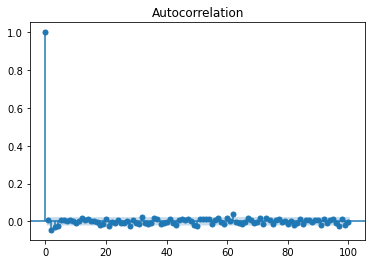

In [10]:
import statsmodels.tsa.api as smt
smt.graphics.plot_acf(logmsft_diff['Adj. Close'], lags=100)
plt.show()

## Plot the PACF chart

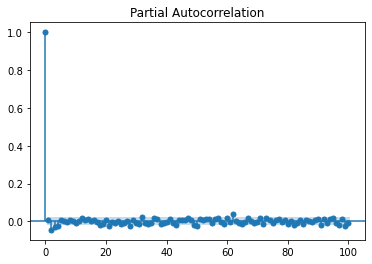

In [11]:
smt.graphics.plot_pacf(logmsft_diff['Adj. Close'], lags=100)
plt.show()

## Create the ARIMA model and returned details about the residual errors

In [12]:
train_set['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
8057   2018-03-01
8058   2018-03-02
8059   2018-03-05
8060   2018-03-06
8061   2018-03-07
Name: Date, Length: 8062, dtype: datetime64[ns]

In [13]:
x=pd.infer_freq(train_set['Date'])


In [26]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes


In [18]:
from statsmodels.tsa.arima_model import ARIMA

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    arima_model_class = ARIMA(train_set['Adj. Close'], freq=None, order=(1,1,1))
    arima_model = arima_model_class.fit(disp=0)

print(arima_model.resid.describe())

count    8.061000e+03
mean    -5.631000e-07
std      4.198119e-01
min     -5.118915e+00
25%     -1.061132e-01
50%     -1.184451e-02
75%      9.848487e-02
max      5.023380e+00
dtype: float64


In [19]:
s = arima_model.resid.describe().to_frame().reset_index()
s

,index,0
0,count,8.061000e+03
1,mean,-5.631000e-07
2,std,4.198119e-01
3,min,-5.118915e+00
4,25%,-1.061132e-01
5,50%,-1.184451e-02
6,75%,9.848487e-02
7,max,5.023380e+00


## Plot the predictions and compare them to the actual observation in the train_set

In [21]:

train_set['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
8057   2018-03-01
8058   2018-03-02
8059   2018-03-05
8060   2018-03-06
8061   2018-03-07
Name: Date, Length: 8062, dtype: datetime64[ns]

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

<Figure size 864x360 with 0 Axes>

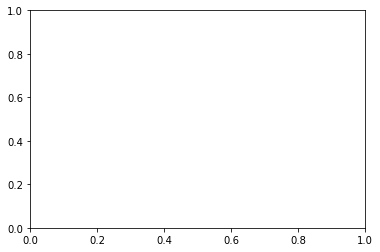

In [20]:
def plot_predict(model, dates_series, num_observations):
    fig = plt.figure(figsize = (12,5))
    model.plot_predict(
        start = str(dates_series[len(dates_series)-num_observations]), 
        end = str(dates_series[len(dates_series)-1])
    )
    plt.show()
    
plot_predict(arima_model, train_set['Date'], 100)
plot_predict(arima_model, train_set['Date'], 10)

## Diagnose the model against the test set values

In [22]:
def compute_test_set_predictions(train_set, test_set):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        history = train_set['Adj. Close'].values
        forecast = np.array([])
        for t in range(len(test_set)):
            prediction = ARIMA(history, order=(1,1,0)).fit(disp=0).forecast()
            history = np.append(history, test_set['Adj. Close'].iloc[t])
            forecast = np.append(forecast, prediction[0])
        return pd.DataFrame(
          {"forecast": forecast,
           "test": test_set['Adj. Close'],
           "Date": pd.date_range(start=test_set['Date'].iloc[len(test_set)-1], periods = len(test_set))
          }
        )
        
results = compute_test_set_predictions(train_set, test_set)
display(results)

## Compute the mean squared error of the predictions for the test set

In [23]:
from sklearn.metrics import mean_squared_error
def compute_mean_squared_error(test_series, forecast_series):
    return mean_squared_error(test_series, forecast_series)

print('Mean Squared Error: {}'.format( compute_mean_squared_error( test_set['Adj. Close'], results.forecast)) )

Mean Squared Error: 6.336538732783259


## Improve the version of the StockExplorer PixieApp to add forecasting with ARIMA
1. Enable the user to enter a list of Stock Tickers
2. Provide a menu for basic plotting: Price over time and Daily stock spread over time
3. Menu for displaying moving average with configurable lag
4. Menu for displaying ACF and PACF with configurable lag
5. Menu for time series forecasting with ARIMA

## Base PixieApp used as parent class for all the subapp associated with each menu

In [24]:
@PixieApp
class BaseSubApp():
    def setup(self):
        self.lag = 50

    def add_ticker_selection_markup(refresh_ids):
        def deco(fn):
            def wrap(self, *args, **kwargs):
                return """
<div class="row" style="text-align:center">
    <div class="btn-group btn-group-toggle" style="border-bottom:2px solid #eeeeee" data-toggle="buttons">
        {%for ticker, state in this.parent_pixieapp.tickers.items()%}
        <label class="btn btn-secondary {%if this.parent_pixieapp.active_ticker == ticker%}active{%endif%}"
            pd_refresh=\"""" + ",".join(refresh_ids) + """\" pd_script="self.set_active_ticker('{{ticker}}')">
            <input type="radio" {%if this.parent_pixieapp.active_ticker == ticker%}checked{%endif%}> 
                {{ticker}}
        </label>
        {%endfor%}
    </div>
</div>
                """ + fn(self, *args, **kwargs)
            return wrap
        return deco
    
    def set_active_ticker(self, ticker):
        self.parent_pixieapp.set_active_ticker(ticker)
    
    @route(widget="lag_slider")
    def slider_screen(self):
        return """
<div>
    <label class="field">Lag:<span id="slideval{{prefix}}">50</span></label>
    <i class="fa fa-info-circle" style="color:orange" data-toggle="pd-tooltip" 
        title="Selected lag used to compute moving average, ACF or PACF"></i>
    <div id="slider{{prefix}}" name="slider" data-min=30 data-max=300
        data-default=50 style="margin: 0 0.6em;">
    </div>
</div>
<script>
$("[id^=slider][id$={{prefix}}]").each(function() {
    var sliderElt = $(this)
    var min = sliderElt.data("min")
    var max = sliderElt.data("max")
    var val = sliderElt.data("default")
    sliderElt.slider({
        min: isNaN(min) ? 0 : min,
        max: isNaN(max) ? 100 : max,
        value: isNaN(val) ? 50 : val,
        change: function(evt, ui) {
            $("[id=slideval{{prefix}}]").text(ui.value); 
            pixiedust.sendEvent({type:'lagSlider',value:ui.value})
        },
        slide: function(evt, ui) {
            $("[id=slideval{{prefix}}]").text(ui.value);
        }
    });
})
</script>
        """

## Sub App for basic exploration of the selected Stock Time Serie

In [25]:
@PixieApp
class StockExploreSubApp(BaseSubApp):
    @route()
    @BaseSubApp.add_ticker_selection_markup(['chart{{prefix}}', 'daily_spread{{prefix}}'])
    def main_screen(self):
        return """
<div class="row" style="min-height:300px">
    <div class="col-xs-6" id="chart{{prefix}}" pd_render_onload pd_options="show_chart=Adj. Close">
    </div>
    <div class="col-xs-6" id="daily_spread{{prefix}}" pd_render_onload pd_options="show_chart=daily_spread">
    </div>
</div>
"""
        
    @route(show_chart="*")
    def show_chart_screen(self, show_chart):
        return """
<div pd_entity="parent_pixieapp.get_active_df()" pd_render_onload>
    <pd_options>
    {
      "handlerId": "lineChart",
      "valueFields": "{{show_chart}}",
      "rendererId": "bokeh",
      "keyFields": "Date",
      "noChartCache": "true",
      "rowCount": "10000"
    }
    </pd_options>
</div>
        """

## Sub App for displaying moving average of the selected Stock Time Serie

In [26]:
@PixieApp
class MovingAverageSubApp(BaseSubApp):
    @route()
    @BaseSubApp.add_ticker_selection_markup(['chart{{prefix}}'])
    def main_screen(self):
        return """
<div class="row" style="min-height:300px">
    <div class="page-header text-center">
        <h1>Moving Average for {{this.parent_pixieapp.active_ticker}}</h1>
    </div>
    <div class="col-sm-12" id="chart{{prefix}}" pd_render_onload pd_entity="get_moving_average_df()">
        <pd_options>
        {
          "valueFields": "Adj. Close",
          "keyFields": "x",
          "rendererId": "bokeh",
          "handlerId": "lineChart",
          "rowCount": "10000"
        }
        </pd_options>
    </div>
</div>
<div class="row">
    <div pd_widget="lag_slider">
        <pd_event_handler 
            pd_source="lagSlider"
            pd_script="self.lag = eventInfo['value']"
            pd_refresh="chart{{prefix}}">
        </pd_event_handler>
    </div>
</div>
"""
    def get_moving_average_df(self):
        ma = self.parent_pixieapp.get_active_df()['Adj. Close'].rolling(window=self.lag).mean()
        ma_df = pd.DataFrame(ma)
        ma_df["x"] = ma_df.index
        return ma_df

## Sub App for displaying ACF and PACF of the selected Stock Time Serie

In [27]:
import statsmodels.tsa.api as smt
@PixieApp
class AutoCorrelationSubApp(BaseSubApp):
    @route()
    @BaseSubApp.add_ticker_selection_markup(['chart_acf{{prefix}}', 'chart_pacf{{prefix}}'])
    def main_screen(self):
        return """
<div class="row" style="min-height:300px">
    <div class="col-sm-6">
        <div class="page-header text-center">
            <h1>Auto-correlation Function</h1>
        </div>
        <div id="chart_acf{{prefix}}" pd_render_onload pd_options="show_acf=true">
        </div>
    </div>
    <div class="col-sm-6">
        <div class="page-header text-center">
            <h1>Partial Auto-correlation Function</h1>
        </div>
        <div id="chart_pacf{{prefix}}" pd_render_onload pd_options="show_pacf=true">
        </div>
    </div>
</div> 

<div class="row">
    <div pd_widget="lag_slider">
        <pd_event_handler 
            pd_source="lagSlider"
            pd_script="self.lag = eventInfo['value']"
            pd_refresh="chart_acf{{prefix}},chart_pacf{{prefix}}">
        </pd_event_handler>
    </div>
</div>
"""
    @route(show_acf='*')
    @captureOutput
    def show_acf_screen(self):
        smt.graphics.plot_acf(self.parent_pixieapp.get_active_df()['Adj. Close'], lags=self.lag)
    
    @route(show_pacf='*')
    @captureOutput
    def show_pacf_screen(self):
        smt.graphics.plot_pacf(self.parent_pixieapp.get_active_df()['Adj. Close'], lags=self.lag)

## Sub App for time series forecasting with ARIMA

In [28]:
from statsmodels.tsa.arima_model import ARIMA

@PixieApp
class ForecastArimaSubApp(BaseSubApp):
    def setup(self):
        self.entity_dataframe = self.parent_pixieapp.get_active_df().copy()
        self.differencing = False
        
    def set_active_ticker(self, ticker):
        BaseSubApp.set_active_ticker(self, ticker)
        self.setup()

    @route()
    @BaseSubApp.add_ticker_selection_markup([])
    def main_screen(self):
        return """
<div class="page-header text-center">
    <h2>1. Data Exploration to test for Stationarity
        <button class="btn btn-default" pd_script="self.toggle_differencing()" pd_refresh>
            {%if this.differencing%}Remove differencing{%else%}Add differencing{%endif%}
        </button>
        <button class="btn btn-default" pd_options="do_forecast=true">
            Continue to Forecast
        </button>
    </h2>
</div>

<div class="row" style="min-height:300px">
    <div class="col-sm-10" id="chart{{prefix}}" pd_render_onload pd_options="show_chart=Adj. Close">
    </div>
</div>

<div class="row" style="min-height:300px">
    <div class="col-sm-6">
        <div class="page-header text-center">
            <h3>Auto-correlation Function</h3>
        </div>
        <div id="chart_acf{{prefix}}" pd_render_onload pd_options="show_acf=true">
        </div>
    </div>
    <div class="col-sm-6">
        <div class="page-header text-center">
            <h3>Partial Auto-correlation Function</h3>
        </div>
        <div id="chart_pacf{{prefix}}" pd_render_onload pd_options="show_pacf=true">
        </div>
    </div>
</div>
        """
    @route(show_chart="*")
    def show_chart_screen(self, show_chart):
        return """
<h3><center>Time Series</center></h3>
<div pd_render_onload pd_entity="entity_dataframe">
    <pd_options>
    {
      "rowCount": "10000",
      "keyFields": "Date",
      "valueFields": "Adj. Close",
      "handlerId": "lineChart",
      "noChartCache": "true"
    }
    </pd_options>
</div>
"""

    @route(show_acf='*')
    @captureOutput
    def show_acf_screen(self):
        smt.graphics.plot_acf(self.entity_dataframe['Adj. Close'], lags=50)
    
    @route(show_pacf='*')
    @captureOutput
    def show_pacf_screen(self):
        smt.graphics.plot_pacf(self.entity_dataframe['Adj. Close'], lags=50)
        
    def toggle_differencing(self):
        if self.differencing:
            self.entity_dataframe = self.parent_pixieapp.get_active_df().copy()
            self.differencing = False
        else:
            log_df = np.log(self.entity_dataframe['Adj. Close'])
            log_df.index = self.entity_dataframe['Date']
            self.entity_dataframe = pd.DataFrame(log_df - log_df.shift()).reset_index()
            self.entity_dataframe.dropna(inplace=True)
            self.differencing = True
            
    @route(do_forecast="true")
    @BaseSubApp.add_ticker_selection_markup([])
    def do_forecast_screen(self):
        return """
<div class="page-header text-center">
    <h2>2. Build Arima model
        <button class="btn btn-default" pd_options="do_diagnose=true">
            Diagnose Model
        </button>
    </h2>
</div>
<div class="row" id="forecast{{prefix}}">
    <div style="font-weight:bold">Enter the p,d,q order for the ARIMA model you want to build</div>

    <div class="form-group" style="margin-left: 20px">
        <label class="control-label">Enter the p order for the AR model:</label>
        <input type="text" class="form-control" id="p_order{{prefix}}" value="1" style="width: 100px;margin-left:10px">

        <label class="control-label">Enter the d order for the Integrated step:</label>
        <input type="text" class="form-control" id="d_order{{prefix}}" value="1" style="width: 100px;margin-left:10px">

        <label class="control-label">Enter the q order for the MA model:</label>
        <input type="text" class="form-control" id="q_order{{prefix}}" value="1" style="width: 100px;margin-left:10px">
    </div>

    <center>
        <button class="btn btn-default" pd_target="forecast{{prefix}}"
            pd_options="p_order=$val(p_order{{prefix}});d_order=$val(p_order{{prefix}});q_order=$val(p_order{{prefix}})">
        Go
        </button>
    </center>
</div>
"""
    @route(p_order="*",d_order="*",q_order="*")
    @templateArgs
    def build_arima_model_screen(self, p_order, d_order, q_order):
        #Build the arima model
        self.train_set = self.parent_pixieapp.get_active_df()[:-14]
        self.test_set = self.parent_pixieapp.get_active_df()[-14:]
        self.arima_model = ARIMA(
            self.train_set['Adj. Close'], dates=self.train_set['Date'], 
            order=(int(p_order),int(d_order),int(q_order))
        ).fit(disp=0)
        self.residuals = self.arima_model.resid.describe().to_frame().reset_index()
        return """
<div class="page-header text-center">
    <h3>ARIMA Model succesfully created</h3>
<div>
<div class="row">
    <div class="col-sm-10 col-sm-offset-3">
        <div pd_render_onload pd_options="plot_predict=true">
        </div>
        <h3>Predicted values against the train set</h3>
    </div>
</div>
<div class="row">
    <div pd_render_onload pd_entity="residuals">
        <pd_options>
        {
          "handlerId": "tableView",
          "table_noschema": "true",
          "table_nosearch": "true",
          "table_nocount": "true"
        }
        </pd_options>
    </div>
    <h3><center>Residual errors statistics</center></h3> 
<div>
        """
    
    @route(plot_predict="true")
    @captureOutput
    def plot_predict(self):
        plot_predict(self.arima_model, self.train_set['Date'], 100)

    def compute_test_set_predictions(self):
        return compute_test_set_predictions(self.train_set, self.test_set)

    @route(do_diagnose="true")
    @BaseSubApp.add_ticker_selection_markup([])
    def do_diagnose_screen(self):
        return """
<div class="page-header text-center"><h2>3. Diagnose the model against the test set</h2></div>
<div class="row">
    <div class="col-sm-10 center" pd_render_onload pd_entity="compute_test_set_predictions()">
        <pd_options>
        {
          "keyFields": "Date",
          "valueFields": "forecast,test",
          "handlerId": "lineChart",
          "rendererId": "bokeh",
          "noChartCache": "true"          
        }
        </pd_options>
    </div>
</div>
"""




## Main class for the StockExplorer PixieApp

In [29]:
@PixieApp
class StockExplorer():
    @route()
    def main_screen(self):
        return """
<style>
    div.outer-wrapper {
        display: table;width:100%;height:300px;
    }
    div.inner-wrapper {
        display: table-cell;vertical-align: middle;height: 100%;width: 100%;
    }
</style>
<div class="outer-wrapper">
    <div class="inner-wrapper">
        <div class="col-sm-3"></div>
        <div class="input-group col-sm-6">
          <input id="stocks{{prefix}}" type="text" class="form-control" 
              value="MSFT,AMZN,IBM"
              placeholder="Enter a list of stocks separated by comma e.g MSFT,AMZN,IBM">
          <span class="input-group-btn">
            <button class="btn btn-default" type="button" pd_options="explore=true">
                <pd_script>
self.select_tickers('$val(stocks{{prefix}})'.split(','))
                </pd_script>
                Explore
            </button>
          </span>
        </div>
    </div>
</div>   
"""
    
    def select_tickers(self, tickers):
        self.tickers = {ticker.strip():{} for ticker in tickers}
        self.set_active_ticker(tickers[0].strip())
        
    def set_active_ticker(self, ticker):
        self.active_ticker = ticker
        if 'df' not in self.tickers[ticker]:
            self.tickers[ticker]['df'] = quandl.get('WIKI/{}'.format(ticker))
            self.tickers[ticker]['df']['daily_spread'] = self.tickers[ticker]['df']['Adj. Close'] - self.tickers[ticker]['df']['Adj. Open']
            self.tickers[ticker]['df'] = self.tickers[ticker]['df'].reset_index()
            
    def get_active_df(self):
        return self.tickers[self.active_ticker]['df']

    @route(explore="*")
    @templateArgs
    def stock_explore_screen(self):
        tabs = [("Explore","StockExploreSubApp"), ("Moving Average", "MovingAverageSubApp"),
                ("ACF and PACF", "AutoCorrelationSubApp"), ("Forecast with ARIMA", "ForecastArimaSubApp")]
        return """
<style>    
    .btn:active, .btn.active {
        background-color:aliceblue;
    }
</style>
<div class="page-header">
  <h1>Stock Explorer PixieApp</h1>
</div>
<div class="container-fluid">
    <div class="row">
        <div class="btn-group-vertical btn-group-toggle col-sm-2" data-toggle="buttons">
            {%for title, subapp in tabs%}
            <label class="btn btn-secondary {%if loop.first%}active{%endif%}"
                pd_options="show_analytic={{subapp}}"
                pd_target="analytic_screen{{prefix}}">
                <input type="radio" {%if loop.first%}checked{%endif%}> 
                    {{title}}
            </label>
            {%endfor%}
        </div>
        <div id="analytic_screen{{prefix}}" class="col-sm-10">
        </div>
    </div>
"""
    @route(show_analytic="*")
    def show_analytic_screen(self, show_analytic):
        return """
<div pd_app="{{show_analytic}}" pd_render_onload></div>
"""
    
app = StockExplorer()
app.run()